In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [56]:
patient_info = pd.read_csv("dataset.csv", header=0)
patient_info.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [57]:
patient_info.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [58]:
#Checking for Null values
patient_info.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

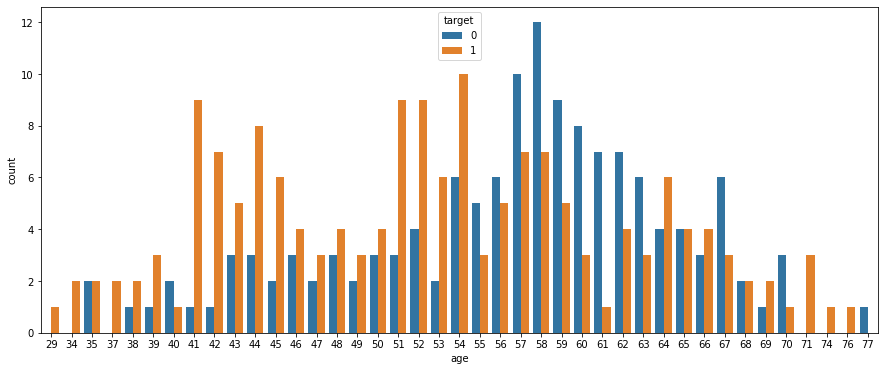

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(x='age', data = patient_info, hue='target')
plt.show()


In [60]:
x = patient_info.drop('target', axis=1)
y = patient_info['target']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state = 5)

In [62]:
#standardize data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)
print(x_train.shape)


(212, 13)


In [65]:
#Neural Network
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6038
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5660
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.5943
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.6604
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6557
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6981
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.6840
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7170
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7500
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7453
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8443
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8349
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8491
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8113
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.7972
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8302
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8208
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8396
Epoch 92/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8349
Epoch 93/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8255
Epoch 94/100
7/7 [===============

In [66]:
model.summary()
score = model.evaluate(x_test, y_test, verbose=0)
print("accuracy: %.2f%%" % (score[1]*100))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                420       
                                                                 
 dropout_6 (Dropout)         (None, 30)                0         
                                                                 
 dense_25 (Dense)            (None, 20)                620       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________
accuracy: 90.11%
